# “Data cleaning for poverty analysis in Peru (2022)”

* Análisis de la evolución de la pobreza y bienestar de los hogares en Perú utilizando data de ENAHO 2022.

👉 módulo (Enaho01a-2022-500)

* Se usará Python (Pandas, NumPy, Matplotlib, Seaborn) para analizar más de 87 000 registros sobre empleo e ingresos de Perú (2022).

* Se hará una limpieza de datos para manejar valores faltantes, duplicados y valores atípicos, asegurando la integridad de los datos para el análisis.

* Se generará visualizaciones y análisis estadístico para identificar disparidades en los ingresos entre las áreas rurales y urbanas, destacando una brecha significativa de ingresos entre las áreas rurales y rurales.

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


📌 Los datos son descargados de la web oficial de ENAHO(Encuesta Nacional de hogares) - INEI (Instituto Nacional de Estadística e Informática) 2022

👉👉 https://www.datosabiertos.gob.pe/dataset/encuesta-nacional-de-hogares-enaho-2022-instituto-nacional-de-estad%C3%ADstica-e-inform%C3%A1tica-%E2%80%93

📌 Descargar el módulo ingresos y empleo (Enaho01a-2022-500) directo aquí:👇👇

✅ https://github.com/WLozanoH/Poverty-Peru/blob/main/Enaho01a-2022-500.zip

In [2]:
#CARGAMOS SOLO LA DATA A ANALIZAR

df = pd.read_csv('Enaho01a-2022-500.csv', sep=',', usecols=['MES','UBIGEO','DOMINIO','ESTRATO',
                                                            'P502','P503','P507','P510','P510A1','P5111','P5116',
                                                            'P51112','P511A','P524A1','OCUPINF','FAC500A'],
                 na_values= ' ')
df.head()

,MES,UBIGEO,DOMINIO,ESTRATO,P502,P503,P507,P510,P510A1,P5111,P5116,P51112,P511A,P524A1,OCUPINF,FAC500A
0,2,10101,4,4,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,5000.0,2.0,48.341564
1,2,10101,4,4,NaN,NaN,4.0,6.0,2.0,0.0,0.0,0.0,7.0,800.0,1.0,46.851582
2,2,10101,4,4,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,1660.0,2.0,50.011681
3,2,10101,4,4,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,2300.0,2.0,26.674692
4,2,10101,4,4,NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,124.382034


📌 Renombrando las variables para mejor manipulación de los datos

In [3]:
#Renombrando las variables
df.rename(columns={'P502':'empleo_fijo', 
                   'P503':'negocio_propio',
                   'P507':'ocupacion_principal',
                   'P510':'trabajo_ocup_principal',
                   'P510A1':'registro_sunat',
                   'P5111':'sueldo_ingresos',
                   'P5116':'honorarios_ingresos',
                   'P51112': 'no_recibe_ingresos',
                   'P511A':'tipo_contrato',
                   'P524A1':'ingreso_total',
                   'FAC500A':'fact_expan_ingresos_empleo'}, inplace=True)

In [4]:
#convertir a minuscula todos las variables del dataframe para mejor manipulación
df.columns = df.columns.str.lower()
df.head()

,mes,ubigeo,dominio,estrato,empleo_fijo,negocio_propio,ocupacion_principal,trabajo_ocup_principal,registro_sunat,sueldo_ingresos,honorarios_ingresos,no_recibe_ingresos,tipo_contrato,ingreso_total,ocupinf,fact_expan_ingresos_empleo
0,2,10101,4,4,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,5000.0,2.0,48.341564
1,2,10101,4,4,NaN,NaN,4.0,6.0,2.0,0.0,0.0,0.0,7.0,800.0,1.0,46.851582
2,2,10101,4,4,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,1660.0,2.0,50.011681
3,2,10101,4,4,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,2300.0,2.0,26.674692
4,2,10101,4,4,NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,124.382034


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87661 entries, 0 to 87660
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mes                         87661 non-null  int64  
 1   ubigeo                      87661 non-null  int64  
 2   dominio                     87661 non-null  int64  
 3   estrato                     87661 non-null  int64  
 4   empleo_fijo                 28473 non-null  float64
 5   negocio_propio              27774 non-null  float64
 6   ocupacion_principal         65240 non-null  float64
 7   trabajo_ocup_principal      25050 non-null  float64
 8   registro_sunat              58720 non-null  float64
 9   sueldo_ingresos             64973 non-null  float64
 10  honorarios_ingresos         64973 non-null  float64
 11  no_recibe_ingresos          64973 non-null  float64
 12  tipo_contrato               37511 non-null  float64
 13  ingreso_total               256

📌 crear un diccionario para darle nombre a los meses  del año 2022

In [6]:
#crear un diccionario para darle nombre a los meses
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Reemplazar los valores numéricos por los nombres de meses
df['mes'] = df['mes'].map(meses)

#orden de meses
orden_meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto', 
    'Septiembre','Octubre','Noviembre','Diciembre']

#ordenando los meses
df['mes'] = pd.Categorical(df['mes'],
                           categories=orden_meses,
                           ordered=True)

📌 Crear un diccionario para darle nombre a la subclasificación del Dominio Geográfico

In [7]:
#crear un diccionario para Dominio Geográfico, 
# variable = 'DOMINIO' para  almacenar los datos de cada región
dominio_geográfico = {
    1: 'Costa Norte',
    2: 'Costa Centro',
    3: 'Costa Sur',
    4: 'Sierra Norte',
    5: 'Sierra Centro',
    6: 'Sierra Sur',
    7: 'Selva',
    8: 'Lima Metropolitana'
}

#Reemplazar los valores numéricos por los nombres de dominio geográfico
df['dominio'] = df['dominio'].map(dominio_geográfico)


📌 Crear un diccionario para estrato la subclasificación de estrato geográfico - se determina las zonas urbanas y rurales


In [8]:
#Crear un diccionario para estrato geográfico
#Área de Empadronamiento Rural = AER
estrato_geografico = {
    
    1: "500,000 a más", 
    2: "100,000 a 499,999", 
    3: "50,000 a 99,999", 
    4: "20,000 a 49,999",
    5: "2,000 a 19,999", 
    6: "500 a 1,999", 
    7: "AER Compuesto",
    8: "AER Simple"
    
}

df['estrato'] = df['estrato'].map(estrato_geografico)

📌 Analizamos la variable "ESTRATO" para clasificar la muestra en URBANO y RURAL

    'AER' = Área de empadronamiento RURAL

In [9]:
#Creando la variable 'ZONAS' para identificar la muestra urbana y rural
df['zonas'] = df['estrato']
#clasificamos la variable 'urbana' y 'rural' usando lambda
df['zonas'] = df['zonas'].apply(lambda x:'rural' if x == 'AER Simple' or  x == 'AER Compuesto' else 'urbano')

In [10]:
#muetra total para la zona urvana y rural
print(df['zonas'].value_counts())
print('---------------')
#porcentaje de la muetra total para la zona urvana y rural
print(df['zonas'].value_counts()/ df['zonas'].shape[0] *100)

zonas
urbano    63453
rural     24208
Name: count, dtype: int64
---------------
zonas
urbano    72.384527
rural     27.615473
Name: count, dtype: float64


In [11]:
df.head()

,mes,ubigeo,dominio,estrato,empleo_fijo,negocio_propio,ocupacion_principal,trabajo_ocup_principal,registro_sunat,sueldo_ingresos,honorarios_ingresos,no_recibe_ingresos,tipo_contrato,ingreso_total,ocupinf,fact_expan_ingresos_empleo,zonas
0,Febrero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,5000.0,2.0,48.341564,urbano
1,Febrero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,4.0,6.0,2.0,0.0,0.0,0.0,7.0,800.0,1.0,46.851582,urbano
2,Febrero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,1660.0,2.0,50.011681,urbano
3,Febrero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,1.0,2300.0,2.0,26.674692,urbano
4,Febrero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,124.382034,urbano


📌 Analizar valores nulos, duplicados y únicos

In [12]:
#verificando valores nulos
total_valores_nulos = df.isnull().sum()
porcentaje_valores_nulos = (total_valores_nulos/len(df)) *100

#creamos un dataframe para mostrar solo resultados nulos
resultado_nulos = pd.DataFrame({'total_nulos':total_valores_nulos,'Porcentaje Nulos(%)':porcentaje_valores_nulos})
print(resultado_nulos)



                            total_nulos  Porcentaje Nulos(%)
mes                                   0             0.000000
ubigeo                                0             0.000000
dominio                               0             0.000000
estrato                               0             0.000000
empleo_fijo                       59188            67.519193
negocio_propio                    59887            68.316583
ocupacion_principal               22421            25.576938
trabajo_ocup_principal            62611            71.424008
registro_sunat                    28941            33.014682
sueldo_ingresos                   22688            25.881521
honorarios_ingresos               22688            25.881521
no_recibe_ingresos                22688            25.881521
tipo_contrato                     50150            57.209021
ingreso_total                     62021            70.750961
ocupinf                           26480            30.207276
fact_expan_ingresos_empl

# Analizando y completando valores nulos para cada variable

📌 Análisis de 'empleo_fijo' = tiene empleo fijo o no

In [13]:
#Análisis de variable 'empleo_fijo':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['empleo_fijo'].fillna('missing value', inplace=True)
#reemplazar valores en 'empleo fijo': 1:empleo fijo, 0: no empleo fijo, desconocido : desconocido
df['empleo_fijo'] = df['empleo_fijo'].replace({1.0: 1, 2.0: 0})


In [14]:
#mapeamos empleo fijo
empleofijo = {
    
    1:'tiene',
    0: 'no tiene',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'empleo_fijo'
df['empleo_fijo'] = df['empleo_fijo'].map(empleofijo)

In [15]:
#revisamos valores en:
df['empleo_fijo'].value_counts()

empleo_fijo
missing value    59188
no tiene         27774
tiene              699
Name: count, dtype: int64

📌 Análisis de 'negocio_propio' = tiene negocio propio o no

In [16]:
#Análisis de variable 'negocio_propio':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['negocio_propio'].fillna('missing value', inplace=True)
#reemplazar valores en 'empleo fijo': 1:negocio propio, 0: no negocio propio, desconocido : desconocido
df['negocio_propio'] = df['negocio_propio'].replace({1.0: 1, 2.0: 0})

In [17]:
#mapeamos negocio_propio
negociopropio = {
    
    1:'tiene',
    0: 'no tiene',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'empleo_fijo'
df['negocio_propio'] = df['negocio_propio'].map(negociopropio)

In [18]:
#revisamos valores en:
df['negocio_propio'].value_counts()

negocio_propio
missing value    59887
no tiene         27387
tiene              387
Name: count, dtype: int64

📌 Análisis de 'ocupacion_principal'

In [19]:
#Análisis de variable 'ocupacion_principal':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['ocupacion_principal'].fillna('missing value', inplace=True)
#reemplazar valores en 'ocupacion_principal': 
df['ocupacion_principal'] = df['ocupacion_principal'].replace({1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7 })

In [20]:
ocupaciones = {
    
    1:'empleador',
    2:'independiente',
    3: 'empleado',
    4: 'obrero',
    5: 'no remunerado',
    6: 'trab. hogar',
    7: 'otro',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'ocupacion_principal'
df['ocupacion_principal'] = df['ocupacion_principal'].map(ocupaciones)

In [21]:
#revisamos valores en:
df['ocupacion_principal'].value_counts()

ocupacion_principal
independiente    25254
missing value    22421
obrero           12697
empleado         12042
no remunerado    11628
empleador         2208
trab. hogar       1100
otro               311
Name: count, dtype: int64

📌 Análisis de trabajo en su ocupación principal = 'trabajo_ocup_principal'

In [22]:
#Análisis de variable 'trabajo_ocup_principal':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['trabajo_ocup_principal'].fillna('missing value', inplace=True)
#reemplazar valores en 'trabajo_ocup_principal':
df['trabajo_ocup_principal'] = df['trabajo_ocup_principal'].replace({1.0: 1, 2.0: 2, 3.0: 3, 5.0: 4, 6.0: 5, 7.0: 6 })

In [23]:
trabajos = {
    
    1:'f.a, pnp, etc',
    2:'administración Pública',
    3: 'empresa pública',
    4: 'service',
    5: 'empresa privada',
    6: 'otra',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'trabajo_ocup_principal'
df['trabajo_ocup_principal'] = df['trabajo_ocup_principal'].map(trabajos)

In [24]:
#reemplazamos empresa pública en administración Pública, dado que abarca un mismo grupo
df['trabajo_ocup_principal'] = df['trabajo_ocup_principal'].replace({'empresa pública':'administración Pública'})

In [25]:
#revisamos valores en:
df['trabajo_ocup_principal'].value_counts()

trabajo_ocup_principal
missing value             62611
empresa privada           19223
administración Pública     5153
service                     407
f.a, pnp, etc               267
Name: count, dtype: int64

📌 Análisis de 'registro_sunat' = si la empresa donde labora está o no registrada en SUNAT

In [26]:
#Análisis de variable 'trabajo_ocup_principal':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['registro_sunat'].fillna('missing value', inplace=True)

#reemplazar valores en 'registro_sunat':
df['registro_sunat'] = df['registro_sunat'].replace({1.0: 1, 2.0: 2, 3.0: 3})

In [27]:
#crear un diccionario para mapear datos de

registros_sunat = {
    
    1:'persona jurídica',
    2:'persona natural',
    3: 'no está registrado',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'registro_sunat'
df['registro_sunat'] = df['registro_sunat'].map(registros_sunat)

In [28]:
#revisamos valores en:
df['registro_sunat'].value_counts()

registro_sunat
no está registrado    43786
missing value         28941
persona jurídica       8336
persona natural        6598
Name: count, dtype: int64

📌 Analizamos la variable 'sueldo_ingresos' = si la persona recibe un sueldo como ingresos o no

In [29]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['sueldo_ingresos'].fillna('missing value', inplace=True)

#reemplazar valores en 'sueldo_ingresos': 1:si tiene sueldo, 0: no tiene sueldo, desconocido : desconocido
df['sueldo_ingresos'] = df['sueldo_ingresos'].replace({1.0: 1, 0.0: 0})

In [30]:
#mapeo de la variable 'sueldo_ingresos':
sueldos = {
    
    1: 'si recibe',
    0: 'otro',
    'missing value':'missing value'
    
}

#reemplazamos los valores en la variable 'sueldo_ingresos'
df['sueldo_ingresos'] = df['sueldo_ingresos'].map(sueldos)

In [31]:
#revisamos valores en:
df['sueldo_ingresos'].value_counts()

sueldo_ingresos
otro             52630
missing value    22688
si recibe        12343
Name: count, dtype: int64

📌 Analisis de la variable 'honorarios_ingresos' = si una persona obtiene ingresos por honorarios profesionales o no

In [32]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['honorarios_ingresos'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1:si , 0: no , desconocido : desconocido
df['honorarios_ingresos'] = df['honorarios_ingresos'].replace({1.0: 1, 0.0: 0})

In [33]:
#mapeo de la variable 'honorarios_ingresos':
honorarios = {
    
    1: 'si recibe',
    0: 'otro',
    'missing value':'missing value'
    
}

#reemplazamos los valores en la variable 'honorarios_ingresos'
df['honorarios_ingresos'] = df['honorarios_ingresos'].map(honorarios)

In [34]:
#revisamos valores en:
df['honorarios_ingresos'].value_counts()

honorarios_ingresos
otro             64583
missing value    22688
si recibe          390
Name: count, dtype: int64

📌 Análisis de la variable 'no_recibe_ingresos' , las personas que a pesar que tienen una ocupación principal, no perciben ningún ingreso

In [35]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['no_recibe_ingresos'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1: no recibe , 0: otro , desconocido : desconocido
df['no_recibe_ingresos'] = df['no_recibe_ingresos'].replace({1.0: 1, 0.0: 0})

In [36]:
#mapeo de la variable 'no_recibe_ingresos':
no_ingresos = {
    
    1: 'no recibe ingresos',
    0: 'otro',
    'missing value':'missing value'
    
}

#reemplazamos los valores en la variable 'no_recibe_ingresos'
df['no_recibe_ingresos'] = df['no_recibe_ingresos'].map(no_ingresos)

In [37]:
#revisamos valores en:
df['no_recibe_ingresos'].value_counts()

no_recibe_ingresos
otro                  53097
missing value         22688
no recibe ingresos    11876
Name: count, dtype: int64

📌 Análisis de la variable 'tipo_contrato' = el tipo de contrato que tiene la persona donde está laborando

In [38]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['tipo_contrato'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1: no recibe , 0: otro , desconocido : desconocido
df['tipo_contrato'] = df['tipo_contrato'].replace({1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7 })

5. Contrato por locación de servicios (Honorarios profesionales, RUC), SNP

6. Regimen Especial de Contratación Administrativa (CAS)

In [39]:
#mapeando valores para 'tipo_contrato'
tipos_contratos = {
    
    1:'indefinido',
    2:'plazo fijo',
    3: 'periodo. prueba',
    4: 'prácticas',
    5: 'locación',
    6: 'cas',
    7: 'otro',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'tipo_contrato'
df['tipo_contrato'] = df['tipo_contrato'].map(tipos_contratos)

In [40]:
#revisamos valores en:
df['tipo_contrato'].value_counts()

tipo_contrato
missing value      50150
otro               25320
plazo fijo          6123
indefinido          3753
locación            1435
cas                  689
prácticas            142
periodo. prueba       48
Name: count, dtype: int64

📌 Análisis de la variable 'ingreso_total' == la cantidad total de ingresos que percibe una persona en este set de datos

In [41]:
## creamos el missing value '999999' por 'nan' para evitar problemas en el cálculo estadístico
df['ingreso_total'].replace(999999, np.nan, inplace=True)

In [42]:
df['ingreso_total'].describe()

count    25343.000000
mean      1240.874009
std       1441.637968
min          1.000000
25%        280.000000
50%        900.000000
75%       1700.000000
max      30000.000000
Name: ingreso_total, dtype: float64

📌 Completando los valores nulos para 'ingreso_total' dado que La mediana es la técnica más robusta frente a outliers, observamos que nuestro dataset contiene valores extremos (ingresos muy altos(max): '30000' o bajos(min):'1'), la mediana es una mejor medida de tendencia central.

📌 completar los valores nulos en la variable 'ingreso_total' usando la mediana de acuerdo a la zona (urbano o rural)

In [43]:
# Agrupar por la columna 'zona' (urbano/rural) y calcular la mediana para cada grupo
mediana_por_zona = df.groupby('zonas')['ingreso_total'].median()

# Crear una función que complete los valores nulos con la mediana correspondiente a la zona
def completar_valores_nulos(row):
    if pd.isnull(row['ingreso_total']):
        return mediana_por_zona[row['zonas']]
    else:
        return row['ingreso_total']
    
# Aplicar la función fila por fila usando 'apply'
df['ingreso_total'] = df.apply(completar_valores_nulos, axis=1)

In [44]:
# Verificar si los valores nulos han sido reemplazados
df['ingreso_total'].isnull().sum()

0

📌 Análisis de la variable 'ocupinf' == situación de informalidad en su ocupación principal

        1 == empleo formal
        2 == empleo informal

In [45]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['ocupinf'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1: no recibe , 0: otro , desconocido : desconocido
df['ocupinf'] = df['ocupinf'].replace({1.0: 1, 2.0: 2})

In [46]:
#mapeando valores para 'ocupinf'
situación_ocupacion = {
    
    1:'empleo formal',
    2:'empleo informal',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'ocupinf'
df['ocupinf'] = df['ocupinf'].map(situación_ocupacion)

In [47]:
df['ocupinf'].value_counts()

ocupinf
empleo formal      48339
missing value      26480
empleo informal    12842
Name: count, dtype: int64

🎯 Valores

        * 'empleo_fijo'(3): 1: si, 0: no, desconocido
        * 'negocio_propio'(3): 1: si, 0: no, desconocido
        * 'ocupación_principal'(8)
        * 'trabajo_ocup_principal'(7)
        * 'registro_sunat'(3)
        * 'sueldo_ingresos'(3): 1: si, 0: otro, desconocido
        * 'honorarios_ingresos'(3) 1: si, 0: otro, desconocido
        * 'no_recibe_ingreso':(3) 1: no recibe, 0: otro, desconocido
        * 'tipo_contrato'(8)
        * 'ingreso_total': variable a analizar para calculo de la pobreza
        * 'ocupinf'(3)


# VERIFICAR VALORES DUPLICADOS

In [48]:
#verificar valores duplicados
print(df.duplicated().sum())
print('--------------')
print(df.duplicated().sum().max())

7940
--------------
7940


In [49]:
#Eliminando filas duplicadas
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(87661, 17)
(79721, 17)


In [50]:
df.info()
#Index: 79721 entries, 0 to 87659

<class 'pandas.core.frame.DataFrame'>
Index: 79721 entries, 0 to 87659
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   mes                         79721 non-null  category
 1   ubigeo                      79721 non-null  int64   
 2   dominio                     79721 non-null  object  
 3   estrato                     79721 non-null  object  
 4   empleo_fijo                 79721 non-null  object  
 5   negocio_propio              79721 non-null  object  
 6   ocupacion_principal         79721 non-null  object  
 7   trabajo_ocup_principal      79721 non-null  object  
 8   registro_sunat              79721 non-null  object  
 9   sueldo_ingresos             79721 non-null  object  
 10  honorarios_ingresos         79721 non-null  object  
 11  no_recibe_ingresos          79721 non-null  object  
 12  tipo_contrato               79720 non-null  object  
 13  ingreso_total        

In [51]:
#tipo de contrato tiene un valor nulo, por lo que se elimina
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(79721, 17)
(79720, 17)


In [52]:
df.info()
#Index: 79720 entries, 0 to 87659

<class 'pandas.core.frame.DataFrame'>
Index: 79720 entries, 0 to 87659
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   mes                         79720 non-null  category
 1   ubigeo                      79720 non-null  int64   
 2   dominio                     79720 non-null  object  
 3   estrato                     79720 non-null  object  
 4   empleo_fijo                 79720 non-null  object  
 5   negocio_propio              79720 non-null  object  
 6   ocupacion_principal         79720 non-null  object  
 7   trabajo_ocup_principal      79720 non-null  object  
 8   registro_sunat              79720 non-null  object  
 9   sueldo_ingresos             79720 non-null  object  
 10  honorarios_ingresos         79720 non-null  object  
 11  no_recibe_ingresos          79720 non-null  object  
 12  tipo_contrato               79720 non-null  object  
 13  ingreso_total        

📌 verificando subniveles en variables categóricas

In [53]:
#filtrando las variables categóricas
cols_cat = df.select_dtypes(include='object')
#verificando subniveles en variables categóricas
for i, col in enumerate(cols_cat):
    print(f'{col}: {cols_cat[col].nunique()} subniveles')

dominio: 8 subniveles
estrato: 8 subniveles
empleo_fijo: 3 subniveles
negocio_propio: 3 subniveles
ocupacion_principal: 8 subniveles
trabajo_ocup_principal: 5 subniveles
registro_sunat: 4 subniveles
sueldo_ingresos: 3 subniveles
honorarios_ingresos: 3 subniveles
no_recibe_ingresos: 3 subniveles
tipo_contrato: 8 subniveles
ocupinf: 3 subniveles
zonas: 2 subniveles


In [54]:
#verificando un solo valor en variables numericas
df.describe()

,ubigeo,ingreso_total,fact_expan_ingresos_empleo
count,79720.000000,79720.000000,79720.000000
mean,131309.847178,925.815416,300.135530
std,67410.221163,881.702800,324.613770
min,10101.000000,1.000000,0.284521
25%,80101.000000,300.000000,96.727310
50%,140106.000000,1000.000000,209.076630
75%,180301.000000,1000.000000,369.175629
max,250305.000000,30000.000000,2438.282959


📌 graficando la variable 'ingreso_total' para verificar la distribución de los datos

Text(0.5, 0, 'Ingreso total mensual')

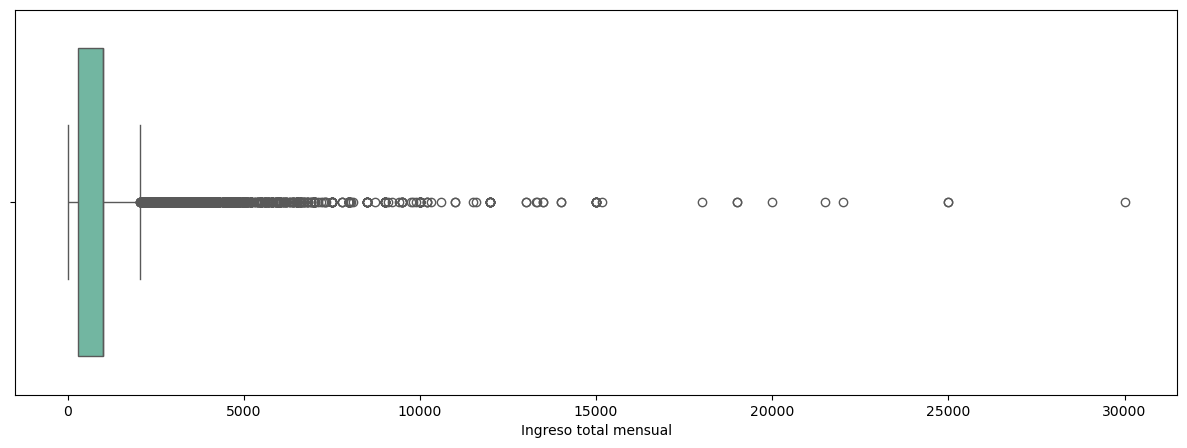

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(x='ingreso_total', data=df, palette = 'Set2')
plt.xlabel('Ingreso total mensual')


📌 Analizamos las variables categóricas 

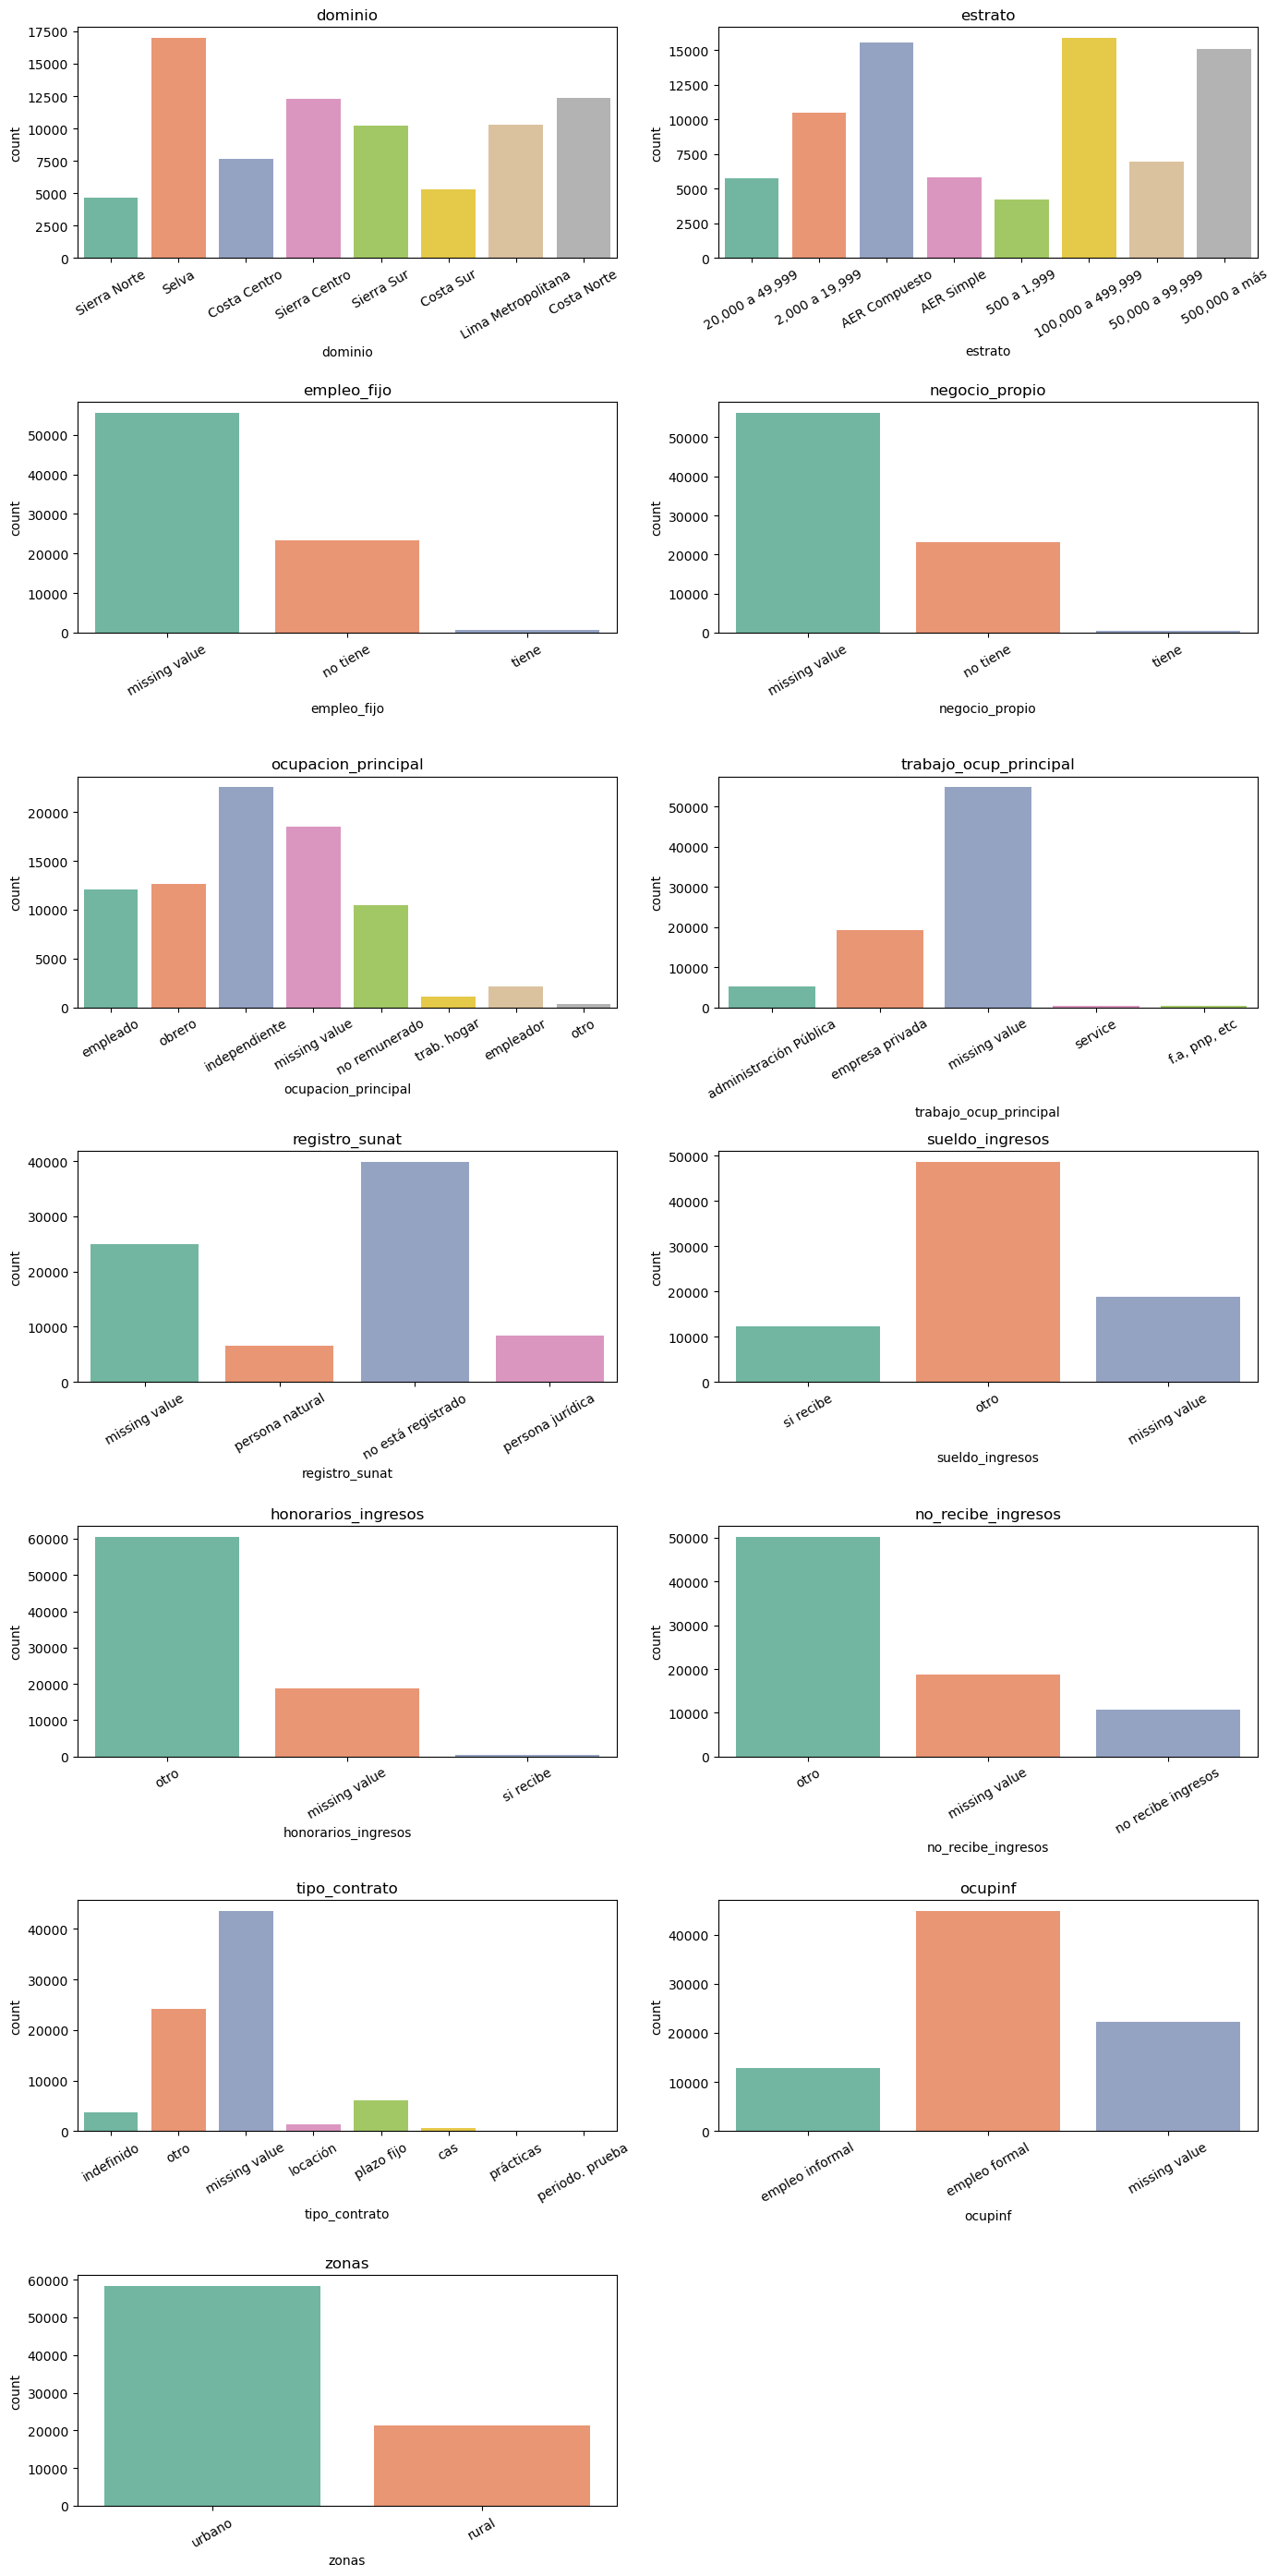

In [56]:
#seleccionamos solo las variables categóricas
cols_cat = df.select_dtypes(include=['object'])

# Definimos el número de filas y columnas de acuerdo con el número de variables categóricas
num_vars = len(cols_cat.columns)
num_rows = (num_vars // 2) + (num_vars % 2)  # Dos gráficos por fila

# Creamos los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Aplanamos el array de axes en caso de que haya más de 1 fila/columna
axes = axes.flatten()

# Recorremos las columnas categóricas y graficamos
for i, col in enumerate(cols_cat.columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)

# Si hay más subplots de los necesarios, los desactivamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustamos la visualización
plt.tight_layout()
plt.show()

🎯 verificamos el promedio de ingresos por zona

In [57]:
df.groupby(df['zonas'])['ingreso_total'].mean()

zonas
rural      358.910701
urbano    1133.836008
Name: ingreso_total, dtype: float64

In [58]:
df.head()

,mes,ubigeo,dominio,estrato,empleo_fijo,negocio_propio,ocupacion_principal,trabajo_ocup_principal,registro_sunat,sueldo_ingresos,honorarios_ingresos,no_recibe_ingresos,tipo_contrato,ingreso_total,ocupinf,fact_expan_ingresos_empleo,zonas
0,Febrero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,empleado,administración Pública,missing value,si recibe,otro,otro,indefinido,5000.0,empleo informal,48.341564,urbano
1,Febrero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,obrero,empresa privada,persona natural,otro,otro,otro,otro,800.0,empleo formal,46.851582,urbano
2,Febrero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,empleado,administración Pública,missing value,si recibe,otro,otro,indefinido,1660.0,empleo informal,50.011681,urbano
3,Febrero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,empleado,administración Pública,missing value,si recibe,otro,otro,indefinido,2300.0,empleo informal,26.674692,urbano
4,Febrero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,independiente,missing value,no está registrado,otro,otro,otro,missing value,1000.0,empleo formal,124.382034,urbano


# Conclusiones del dataset analizado:

✅ *1. Disparidad significativa de ingresos:* Se observó una diferencia marcada entre las zonas rurales y urbanas de Perú. Los ingresos promedios en zonas urbanas (S/1,133.84) son significativamente más altos que en zonas rurales (S/358.91), lo que resalta una brecha importante de desarrollo económico y acceso a oportunidades laborales.

✅ *2. Predominio del empleo informal:* El análisis evidenció que una parte considerable de la población se encuentra en empleo informal, lo cual impacta negativamente en sus ingresos y estabilidad laboral. Las personas en esta situación muestran una tendencia a tener ingresos más bajos y sin contratos laborales estables.

✅ *3. Variabilidad en los ingresos por tipo de empleo:* La diversidad en los tipos de empleo (empleo fijo, negocio propio, ocupaciones informales) genera una gran dispersión en los ingresos, observándose que las personas con empleo fijo y negocios propios tienden a tener mayores ingresos.

✅ *4. Calidad y consistencia de los datos:* Durante la limpieza de los datos, se eliminaron duplicados y registros con valores nulos, lo que permitió mejorar la calidad del análisis. La identificación y tratamiento de valores faltantes en variables como "tipo de contrato" y la categorización de subniveles dentro de las variables cualitativas aseguraron un conjunto de datos consistente para el análisis.

In [59]:
#guardamos la data para pasar al análisis exploratorio
ruta = ('C:\\Users\\LENOVO\\Desktop\\Projects\\Poverty-Peru\\data2022-500-limpia.csv')

df.to_csv(ruta,index=False)
